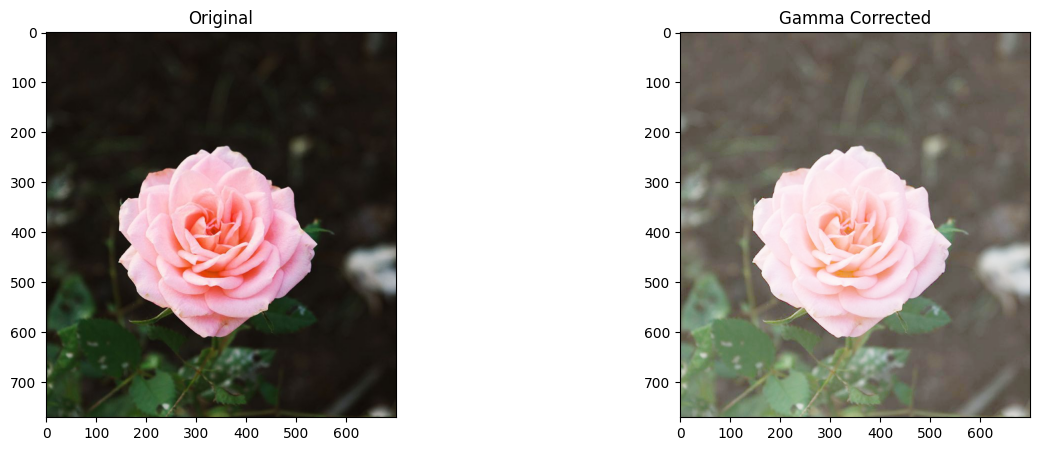

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set gamma value
gamma = 0.4  # <1 to brighten an underexposed image

# Read the original image
img_original = cv2.imread("dias flowers.jpg")

# Create a lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction using the lookup table
out = cv2.LUT(img_original, lookUpTable)

# Display original and corrected images side by side
plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.imshow(img_original[..., ::-1])  # Convert BGR → RGB
plt.title("Original")
plt.subplot(122)
plt.imshow(out[..., ::-1])
plt.title("Gamma Corrected")
plt.show()

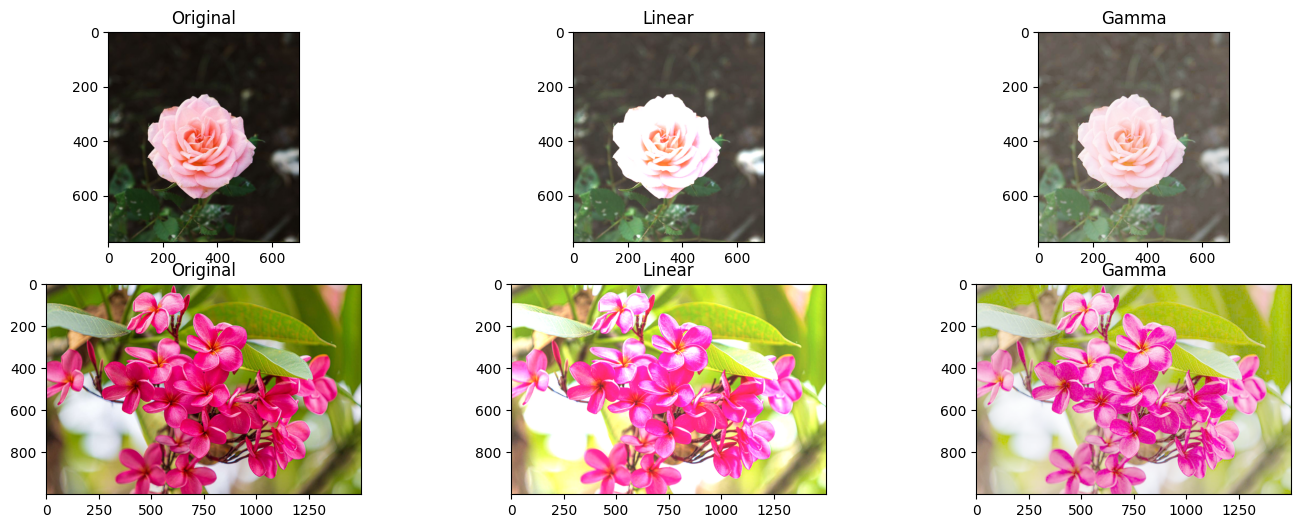

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set gamma value
gamma = 0.4  # Brightening factor for gamma correction

# Read two original images
img_original1 = cv2.imread("dias flowers.jpg")
img_original2 = cv2.imread("dias flowers 2.jpg")

# Check if images are loaded successfully
if img_original1 is None:
    print("Error: Could not load dias flowers.jpg")
    exit()
if img_original2 is None:
    print("Error: Could not load dias flowers 2.jpg. Please ensure the file is uploaded.")
    # Skip processing for img_original2 if it's not loaded
    img_original2_loaded = False
else:
    img_original2_loaded = True

# Apply linear brightness and contrast adjustment
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
if img_original2_loaded:
    output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)

# Prepare lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction
output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
if img_original2_loaded:
    output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)

# Display original, linear, and gamma-corrected images side by side
plt.figure(figsize=[17,6])

plt.subplot(231)
plt.imshow(img_original1[..., ::-1])
plt.title("Original")
plt.subplot(232)
plt.imshow(output_linear1[..., ::-1])
plt.title("Linear")
plt.subplot(233)
plt.imshow(output_gammacorrected1[..., ::-1])
plt.title("Gamma")

if img_original2_loaded:
    plt.subplot(234)
    plt.imshow(img_original2[..., ::-1])
    plt.title("Original")
    plt.subplot(235)
    plt.imshow(output_linear2[..., ::-1])
    plt.title("Linear")
    plt.subplot(236)
    plt.imshow(output_gammacorrected2[..., ::-1])
    plt.title("Gamma")

plt.show()